In [3]:
import numpy as np
import matplotlib.pyplot as plt

## ポアソン分布の学習と予測
共役事前分布 : Gamma分布

In [63]:
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import nbinom

# 訓練データの生成
mu = 4 # 真の値
size = 20

x =poisson.rvs(mu=mu,size=size)
x

array([5, 5, 6, 2, 4, 4, 7, 6, 6, 4, 2, 3, 5, 3, 3, 7, 2, 0, 3, 6])

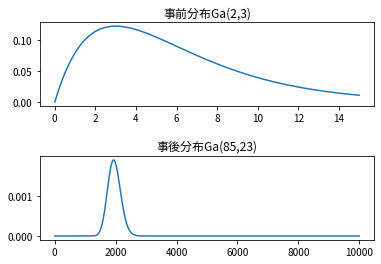

ベイズ推定量 : 3.695652


In [64]:
# 事前分布のパラメータ
alpha_pre,beta_pre = 2,3

alpha_pro = alpha_pre + x.sum()
beta_pro =  beta_pre + size

xscale_pre = np.linspace(0,15,1500)
xscale_pro = np.linspace(0,10000,10000)
prob_pre = gamma.pdf(xscale_pre,a=alpha_pre,scale=beta_pre)
prob_pro = gamma.pdf(xscale_pro,a=alpha_pro,scale=beta_pro)
plt.figure(facecolor="white")
plt.subplot(2,1,1)
plt.plot(xscale_pre,prob_pre)
plt.title("事前分布Ga("+str(alpha_pre)+","+str(beta_pre)+")")

plt.subplot(2,1,2)
plt.plot(xscale_pro,prob_pro)
plt.title("事後分布Ga("+str(alpha_pro)+","+str(beta_pro)+")")
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

print("ベイズ推定量 : %lf" %(alpha_pro/beta_pro))

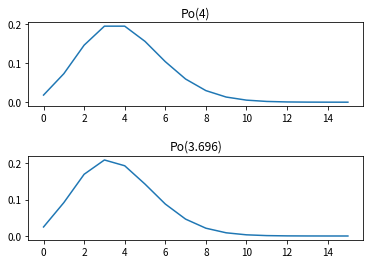

In [65]:
# サンプルを生成したモデルとベイズ推定量に基づいたモデルを比較
xscale = np.linspace(0,15,16)

gen_dist = poisson.pmf(xscale,mu=mu) # 生成元の分布
est_dist = poisson.pmf(xscale,mu=alpha_pro/beta_pro) # ベイズ推定量に基づいた分布

plt.figure(facecolor="white")
plt.subplot(2,1,1)
plt.plot(xscale,gen_dist)
plt.title("Po("+str(mu)+")")

plt.subplot(2,1,2)
plt.plot(xscale,est_dist)
plt.title("Po("+str(round(alpha_pro/beta_pro,3))+")")
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

# 予測分布

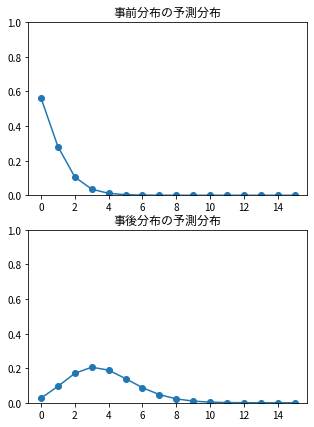

In [66]:
# 事前分布のとき
r_pre = alpha_pre
p_pre = 1/(1+beta_pre)
# 事後分布のとき
r_pro = alpha_pro
p_pro = 1/(1+beta_pro)

xscale = np.arange(0,16)
predict_pre = nbinom.pmf(xscale,n=r_pre,p=1-p_pre)
predict_pro = nbinom.pmf(xscale,n=r_pro,p=1-p_pro)

plt.figure(facecolor="white",figsize=(5,7))
plt.subplot(2,1,1)
plt.plot(xscale,predict_pre)
plt.scatter(xscale,predict_pre)
plt.ylim(0,1)
plt.title("事前分布の予測分布")

plt.subplot(2,1,2)
plt.plot(xscale,predict_pro)
plt.scatter(xscale,predict_pro)
plt.ylim(0,1)
plt.title("事後分布の予測分布")
plt.show()